#Importando as Bibliotecas:

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt
import seaborn as sns

#1ºParte: Coleta de dados e preparação do dataframe:

Interessante notar que cada vez que os comandos abaixo são postos para funcionar, os preços e volumes são constantemente atualizados. Isso gera uma dificuldade, mas também gera uma análise mais precisa que deve considerar a mudança dos preços.

In [ ]:
request = requests.get("https://www.coingecko.com/en/nft").text

In [ ]:
df = pd.read_html(request)

In [ ]:
df1 = df[0]

In [ ]:
df1

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.199 ETH,?,NaN,969.13 ETH,"10,925.78 ETH",2648.0,?,4870.0
1,2,Bored Ape Yacht Club,92.0 ETH,?,NaN,"920,000.0 ETH","1,692.79 ETH",6309.0,?,10000.0
2,3,CloneX,15.99 ETH,?,NaN,"301,395.51 ETH","1,029.29 ETH",8270.0,?,18849.0
3,4,Azuki,11.23 ETH,?,NaN,"112,300.0 ETH",871.19 ETH,5416.0,?,10000.0
4,5,Mutant Ape Yacht Club,19.49 ETH,?,NaN,"349,923.46 ETH",772.71 ETH,11720.0,?,17954.0
5,6,Cool Pets,2.43 ETH,?,NaN,"44,405.82 ETH",545.15 ETH,10796.0,?,18274.0
6,7,LAND,3.84 ETH,?,NaN,"552,894.72 ETH",411.5 ETH,19652.0,?,143983.0
7,8,Doodles,14.0 ETH,?,NaN,"140,000.0 ETH",393.33 ETH,5992.0,?,10000.0
8,9,CrypToadz,3.0 ETH,?,NaN,"21,075.0 ETH",202.22 ETH,3851.0,?,7025.0
9,10,CyberKongz,8.1 ETH,?,NaN,"40,500.0 ETH",177.17 ETH,2434.0,?,5000.0


- Como eu quero por volta dos últimos 500 NFTs e cada página da coingecko oferece 25 nfts, preciso acessar até a página 20.

In [ ]:
dfs = []
for i in range (2, 6):
  request2 = requests.get(f"https://www.coingecko.com/en/nft?page={i}").text
  df = pd.read_html(request2)
  dfs.append(df)

In [ ]:
dfs

[[     #                           NFT  ... 24h Owners Total Assets
  0   26                FVCK_CRYSTAL//  ...          ?       4169.0
  1   27                Creature World  ...          ?      10000.0
  2   28                   Phanta Bear  ...          ?      10000.0
  3   29                       Blitmap  ...          ?       1700.0
  4   30                     LilHeroes  ...          ?       7776.0
  5   31                  Crypto Coven  ...          ?       9757.0
  6   32                      Smilesss  ...          ?       8732.0
  7   33                 Capsule House  ...          ?      10000.0
  8   34                  loomlock NFT  ...          ?       9546.0
  9   35  Forgotten Runes Wizards Cult  ...          ?       9409.0
  10  36                      BYOPills  ...          ?      10000.0
  11  37                     MekaVerse  ...          ?       8888.0
  12  38                 OnChainMonkey  ...          ?       9500.0
  13  39                GenesisApostle  ...     

In [ ]:
len(dfs)

4

In [ ]:
datasets = []
for i in range(len(dfs)):
  datasets.append(dfs[i][0])

In [ ]:
len(datasets)

4

In [ ]:
df_final = pd.concat([df1, datasets[0], datasets[1], datasets[2], datasets[3]], ignore_index=True)

In [ ]:
df_final

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.199 ETH,?,NaN,969.13 ETH,"10,925.78 ETH",2648.0,?,4870.0
1,2,Bored Ape Yacht Club,92.0 ETH,?,NaN,"920,000.0 ETH","1,692.79 ETH",6309.0,?,10000.0
2,3,CloneX,15.99 ETH,?,NaN,"301,395.51 ETH","1,029.29 ETH",8270.0,?,18849.0
3,4,Azuki,11.23 ETH,?,NaN,"112,300.0 ETH",871.19 ETH,5416.0,?,10000.0
4,5,Mutant Ape Yacht Club,19.49 ETH,?,NaN,"349,923.46 ETH",772.71 ETH,11720.0,?,17954.0
...,...,...,...,...,...,...,...,...,...,...
120,121,Borpacasso,0.063 ETH,?,NaN,141.75 ETH,0.0 ETH,1149.0,?,2250.0
121,122,Pudgy Halloween,ETH,?,NaN,0.0 ETH,0.0 ETH,1327.0,?,3.0
122,123,Spookies,0.0123 ETH,?,NaN,109.32 ETH,0.0 ETH,2676.0,?,8888.0
123,124,Lee Mullican,ETH,?,NaN,0.0 ETH,0.0 ETH,15.0,?,16.0


###Floor Price:

In [ ]:
prices = []
for price in df_final['Floor Price']:
  price = price.split()
  if price[0] == 'ETH':
    price[0] = 0
    price.append('ETH')
  
  prices.append(price[0])

In [ ]:
df_final['Floor Price'] = prices

In [ ]:
df_final['Floor Price'] = df_final['Floor Price'].astype(float)

###Market Cap:

In [ ]:
df_final['Market Cap']

0          969.13 ETH
1       920,000.0 ETH
2      301,395.51 ETH
3       112,300.0 ETH
4      349,923.46 ETH
            ...      
120        141.75 ETH
121           0.0 ETH
122        109.32 ETH
123           0.0 ETH
124          7.25 ETH
Name: Market Cap, Length: 125, dtype: object

In [ ]:
market_caps = []
for market_cap in df_final['Market Cap']:
  market_cap = market_cap.split()
  market_caps.append(market_cap[0])

In [ ]:
for i in market_caps:
  if type(i) != type('str'):
    print('Não tem dados com tipo string')

In [ ]:
market_caps_final = []
for mks in market_caps:
  mks = mks.split(',')
  if len(mks) > 1:
    mks = mks[0] + '' + mks[1]
    market_caps_final.append(mks)
  else:
    market_caps_final.append(mks[0])


In [ ]:
df_final['Market Cap'] = market_caps_final

In [ ]:
market_caps_final = df_final['Market Cap'].astype(float)

###24h(Variação em %):

In [ ]:
df_final = df_final.rename(columns={'24h':'24h(%)'})

In [ ]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.199,?,NaN,969.13,"10,925.78 ETH",2648.0,?,4870.0
1,2,Bored Ape Yacht Club,92.000,?,NaN,920000.0,"1,692.79 ETH",6309.0,?,10000.0
2,3,CloneX,15.990,?,NaN,301395.51,"1,029.29 ETH",8270.0,?,18849.0
3,4,Azuki,11.230,?,NaN,112300.0,871.19 ETH,5416.0,?,10000.0
4,5,Mutant Ape Yacht Club,19.490,?,NaN,349923.46,772.71 ETH,11720.0,?,17954.0


In [ ]:
tfhours = []
try:
  for per in df_final['24h(%)']:
    per = per.split('%')
    tfhours.append(float(per[0]))
except:
  print("not valid")

not valid


In [ ]:
if len(tfhours) > 0:
  df_final['24h(%)'] = tfhours

In [ ]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.199,?,NaN,969.13,"10,925.78 ETH",2648.0,?,4870.0
1,2,Bored Ape Yacht Club,92.000,?,NaN,920000.0,"1,692.79 ETH",6309.0,?,10000.0
2,3,CloneX,15.990,?,NaN,301395.51,"1,029.29 ETH",8270.0,?,18849.0
3,4,Azuki,11.230,?,NaN,112300.0,871.19 ETH,5416.0,?,10000.0
4,5,Mutant Ape Yacht Club,19.490,?,NaN,349923.46,772.71 ETH,11720.0,?,17954.0


###24h Volume:

In [ ]:
df_final['24h Volume']

0      10,925.78 ETH
1       1,692.79 ETH
2       1,029.29 ETH
3         871.19 ETH
4         772.71 ETH
           ...      
120          0.0 ETH
121          0.0 ETH
122          0.0 ETH
123          0.0 ETH
124          0.0 ETH
Name: 24h Volume, Length: 125, dtype: object

In [ ]:
daily_volumes  = []
for daily_volume in df_final['24h Volume']:
  if ',' in daily_volume:
    daily_volume = daily_volume.split(',')
    daily_volume = daily_volume[0] + '' + daily_volume[1]
    daily_volume = daily_volume.split()
    daily_volumes.append(daily_volume[0])
  else:  
    daily_volume = daily_volume.split()
    daily_volume = daily_volume[0]
    daily_volumes.append(daily_volume)


In [ ]:
daily_volumes
    

['10925.78',
 '1692.79',
 '1029.29',
 '871.19',
 '772.71',
 '545.15',
 '411.5',
 '393.33',
 '202.22',
 '177.17',
 '166.25',
 '143.58',
 '141.49',
 '132.82',
 '118.17',
 '111.76',
 '88.37',
 '87.39',
 '81.35',
 '74.0',
 '67.65',
 '66.92',
 '66.21',
 '52.89',
 '49.87',
 '49.63',
 '44.81',
 '43.54',
 '41.48',
 '37.33',
 '35.51',
 '34.04',
 '30.48',
 '30.46',
 '30.04',
 '29.23',
 '27.95',
 '27.32',
 '26.46',
 '26.12',
 '25.52',
 '22.36',
 '21.95',
 '21.86',
 '19.93',
 '19.6',
 '18.42',
 '17.46',
 '17.07',
 '17.06',
 '16.52',
 '16.0',
 '15.81',
 '14.27',
 '12.6',
 '11.88',
 '10.29',
 '9.67',
 '9.51',
 '9.4',
 '8.47',
 '8.02',
 '7.81',
 '7.59',
 '7.12',
 '5.61',
 '5.36',
 '5.21',
 '4.46',
 '4.4',
 '4.35',
 '4.22',
 '3.82',
 '3.56',
 '3.27',
 '3.18',
 '2.53',
 '2.44',
 '2.41',
 '2.36',
 '1.98',
 '1.9',
 '1.8',
 '1.32',
 '1.28',
 '1.13',
 '1.13',
 '1.08',
 '1.08',
 '1.04',
 '0.77',
 '0.68',
 '0.62',
 '0.59',
 '0.57',
 '0.54',
 '0.5',
 '0.5',
 '0.4',
 '0.38',
 '0.38',
 '0.37',
 '0.34',
 '0.28',

In [ ]:
df_final['24h Volume'] = daily_volumes

In [ ]:
df_final['24h Volume'].astype(float)

0      10925.78
1       1692.79
2       1029.29
3        871.19
4        772.71
         ...   
120        0.00
121        0.00
122        0.00
123        0.00
124        0.00
Name: 24h Volume, Length: 125, dtype: float64

###24h Owners:

In [ ]:
df_final['24h Owners']

0      ?
1      ?
2      ?
3      ?
4      ?
      ..
120    ?
121    ?
122    ?
123    ?
124    ?
Name: 24h Owners, Length: 125, dtype: object

In [ ]:
daily_owners = []
for d_owner in df_final['24h Owners']:
  d_owner = d_owner.split('%')
  daily_owners.append(d_owner[0])

In [ ]:
df_final['24h Owners'] = daily_owners

In [ ]:
len(daily_owners)

125

In [ ]:
for els in df_final['24h Owners']:
  if type(els) != type('str'):
    df_final['24h Owners'].astype(float)

##Razão dos proprietários (Owner Ratio):

In [ ]:
df_final['Owner Ratio'] = df_final['Owners'] / df_final ['Total Assets']

In [ ]:
df_final['Owner Ratio'] = df_final['Owner Ratio']*100

#2ºParte: Limpeza dos dados

In [ ]:
df_final.isnull().sum()

#                 0
NFT               0
Floor Price       0
24h(%)            0
7d              125
Market Cap        0
24h Volume        0
Owners            0
24h Owners        0
Total Assets      0
Owner Ratio       1
dtype: int64

In [ ]:
df_final.drop(columns=["7d", "#"], inplace=True)

In [ ]:
df_final.duplicated().sum()

0

In [ ]:
df = df_final

#Salvando em CSV:

In [ ]:
df.to_csv(r'/content/df_final.csv', index=False, header=True)

In [ ]:
df_test = pd.read_csv("df_final.csv")

In [ ]:
df_test.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.199,?,969.13,10925.78,2648.0,?,4870.0,54.373717
1,Bored Ape Yacht Club,92.000,?,920000.00,1692.79,6309.0,?,10000.0,63.090000
2,CloneX,15.990,?,301395.51,1029.29,8270.0,?,18849.0,43.875007
3,Azuki,11.230,?,112300.00,871.19,5416.0,?,10000.0,54.160000
4,Mutant Ape Yacht Club,19.490,?,349923.46,772.71,11720.0,?,17954.0,65.277932


#A continuação das partes será imediata para aproveitar a sincronicidade via API do dataset. No entanto, deixo o dataset salvo pós-tratamento para qualquer motivo que seja.

#3ºParte: Análise do dataframe




##Importando as bibliotecas:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

##Importando o dataset:

In [ ]:
df = df_final.copy()

##Quais colunas nos interessam?

In [ ]:
df.columns

Index(['NFT', 'Floor Price', '24h(%)', 'Market Cap', '24h Volume', 'Owners',
       '24h Owners', 'Total Assets', 'Owner Ratio'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NFT           125 non-null    object 
 1   Floor Price   125 non-null    float64
 2   24h(%)        125 non-null    object 
 3   Market Cap    125 non-null    object 
 4   24h Volume    125 non-null    object 
 5   Owners        125 non-null    float64
 6   24h Owners    125 non-null    object 
 7   Total Assets  125 non-null    float64
 8   Owner Ratio   124 non-null    float64
dtypes: float64(4), object(5)
memory usage: 8.9+ KB


In [ ]:
df.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.199,?,969.13,10925.78,2648.0,?,4870.0,54.373717
1,Bored Ape Yacht Club,92.000,?,920000.0,1692.79,6309.0,?,10000.0,63.090000
2,CloneX,15.990,?,301395.51,1029.29,8270.0,?,18849.0,43.875007
3,Azuki,11.230,?,112300.0,871.19,5416.0,?,10000.0,54.160000
4,Mutant Ape Yacht Club,19.490,?,349923.46,772.71,11720.0,?,17954.0,65.277932


In [ ]:
df.tail()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
120,Borpacasso,0.0630,?,141.75,0.0,1149.0,?,2250.0,51.066667
121,Pudgy Halloween,0.0000,?,0.0,0.0,1327.0,?,3.0,44233.333333
122,Spookies,0.0123,?,109.32,0.0,2676.0,?,8888.0,30.108011
123,Lee Mullican,0.0000,?,0.0,0.0,15.0,?,16.0,93.750000
124,United Punks Union,0.0020,?,7.25,0.0,1192.0,?,3624.0,32.891832


In [ ]:
df.corr(method="pearson")

,Floor Price,Owners,Total Assets,Owner Ratio
Floor Price,1.000000,0.187025,0.022090,-0.023629
Owners,0.187025,1.000000,0.724909,-0.091535
Total Assets,0.022090,0.724909,1.000000,-0.079747
Owner Ratio,-0.023629,-0.091535,-0.079747,1.000000


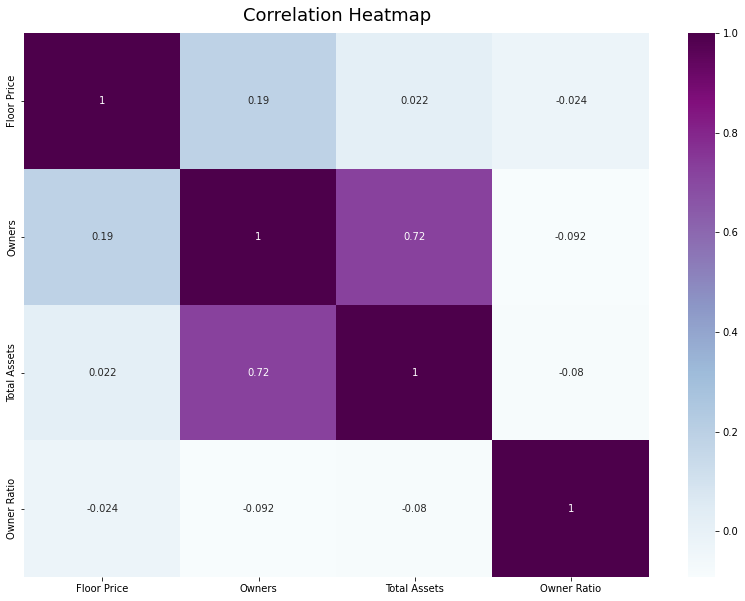

In [ ]:
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(df.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

##Análise de cada coluna:

###Floor Price:

In [ ]:
df['Floor Price']

0       0.1990
1      92.0000
2      15.9900
3      11.2300
4      19.4900
        ...   
120     0.0630
121     0.0000
122     0.0123
123     0.0000
124     0.0020
Name: Floor Price, Length: 125, dtype: float64

In [ ]:
df['Floor Price'].describe()

count    125.000000
mean       2.439973
std        8.811084
min        0.000000
25%        0.078000
50%        0.285000
75%        1.600000
max       92.000000
Name: Floor Price, dtype: float64

In [ ]:
df2 = df[df['Floor Price'] < 80]

In [ ]:
df2['Floor Price'].describe()

count    124.000000
mean       1.717715
std        3.539649
min        0.000000
25%        0.077875
50%        0.282500
75%        1.501000
max       19.490000
Name: Floor Price, dtype: float64

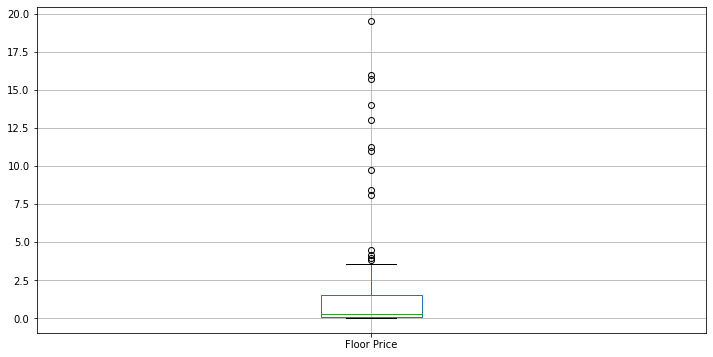

In [ ]:
plt.figure(figsize=(12,6))
df2.boxplot('Floor Price')
plt.show()

- Os dados estão concentrados por volta de 0 e 5 ETH. O que nos indica lançamentos baixos, exceto por alguns outliers discrepantes.

####Visualização dos dados:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


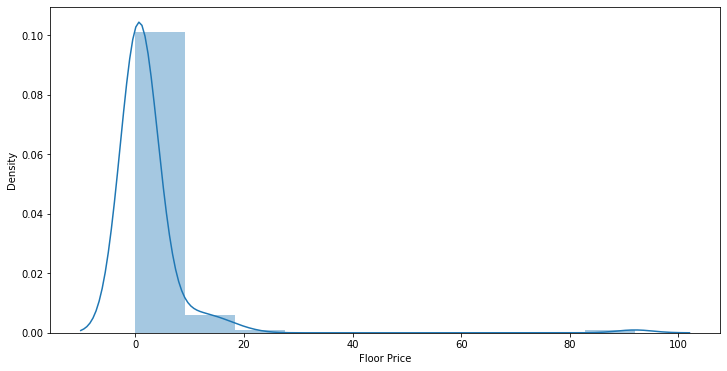

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['Floor Price'], bins=10)

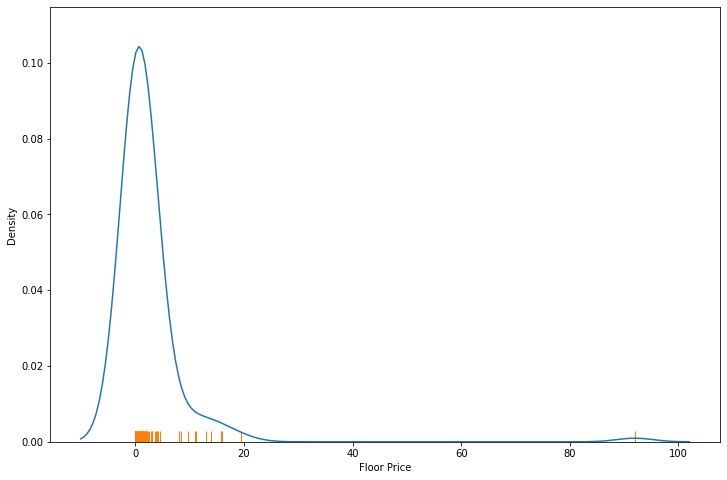

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Floor Price'])
sns.rugplot(df['Floor Price'])

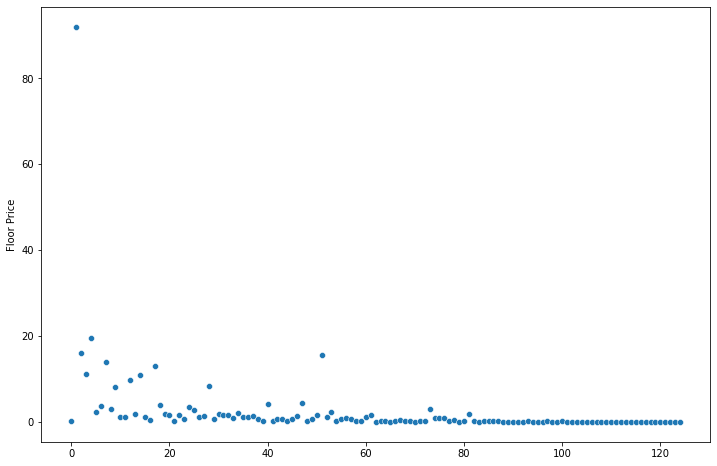

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Floor Price'])

- As visualizações ajudam a gente perceber a distribuição concentrada entre 0 e 5 ETH. Lembrando que 1 ETH, atualmente (10/02/2022) está por volta de $3.000,00. O Floor Price é o valor mais baixo para alguém ser participante de um projeto NFT. Considerando que são os projetos mais valorizados, é natural que esses projetos tenham floor prices altos.

###Variação nas últimas 24 horas:

- Essa coluna não nos informa muito sobre o dataset de um modo geral, visto que para termos uma informação de qualidade, sempre terá de ser dinâmica a relação mética fornecida nessa coluna, por isso as informações de estatística descritiva serão suficiente

In [ ]:
df['24h(%)'].describe()

count     125
unique      1
top         ?
freq      125
Name: 24h(%), dtype: object

In [ ]:
df[df['24h(%)'] == 904]

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio


- É possível sabermos os NFTs que tem um crescimento nas últimas 24 horas acima da média:

In [ ]:
#df_mean24h = df[df['24h(%)'] > df['24h(%)'].mean() ]

In [ ]:
#df_mean24h.describe()

NameError: ignored

Essas informações são bem interessantes, válida para o dia 10/02/2022:
- 25 NFTs dos 125 tem crescimento das últimas 24 horas acima da média
- 1.96 ETH é a média do Floor Price

####Visualização de dados:

KeyError: ignored

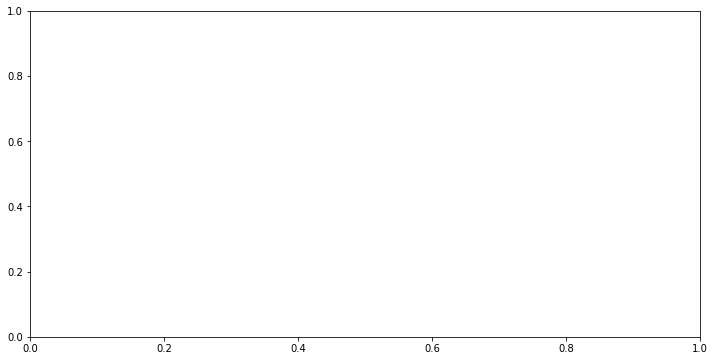

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot('24h(%)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
df_mean24h.boxplot('24h(%)')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['24h(%)'], bins=10)

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['24h(%)'])
sns.rugplot(df_mean24h['24h(%)'])

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_mean24h['24h(%)'])

- O Floor Price desses projetos com crescimento acima da média:

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['Floor Price'], bins=10)

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['Floor Price'])
sns.rugplot(df_mean24h['Floor Price'])

###Market Cap:

- O market cap é o que entenderíamos pela receita total do projeto. No entanto, muitos indicadores (incluindo a coingecko), simplesmente multiplicam a quantidade de NFTs (total assets) pelo preço do NFT mais baixo (floor price), o que significa que não é exatamente confiável. O market cap é o melhor parâmetro para entender o crescimento do projeto a longo prazo e o seu sucesso, porém, como tudo em finanças, não é uma medida exata, existem diversos outros fatores que garantem o sucesso de um projeto.

In [ ]:
df['Market Cap'] = df['Market Cap'].astype(float)

In [ ]:
df['Market Cap'].describe()

count       125.000000
mean      28181.070480
std      104492.302324
min           0.000000
25%         655.490000
50%        2648.970000
75%       13914.500000
max      920000.000000
Name: Market Cap, dtype: float64

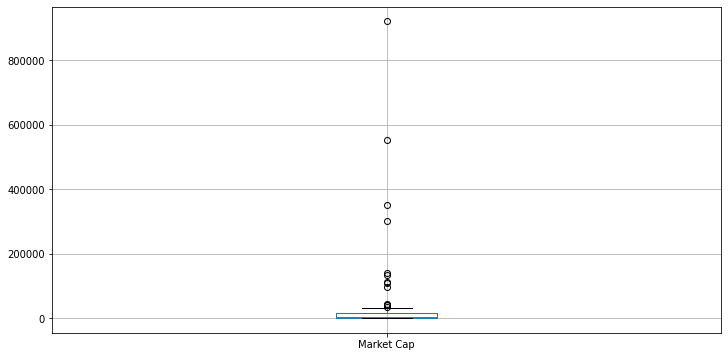

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot('Market Cap')
plt.show()

####Visualização de dados:

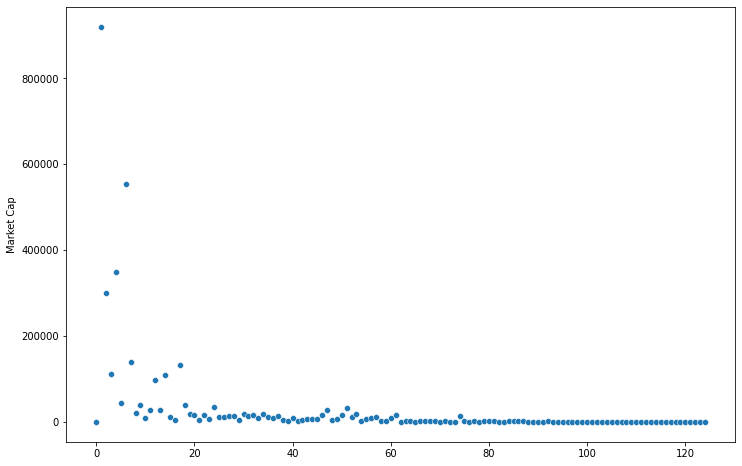

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Market Cap'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


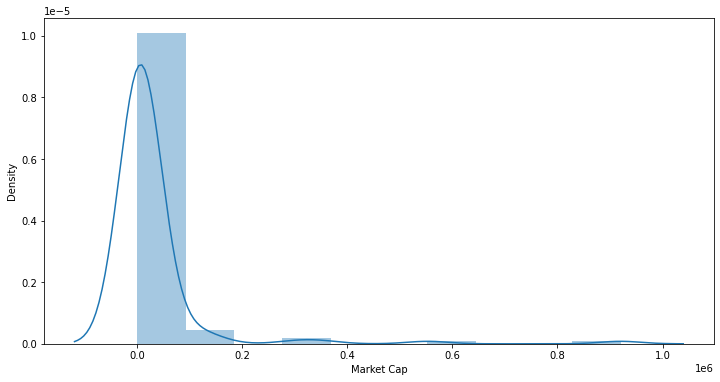

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['Market Cap'], bins=10)

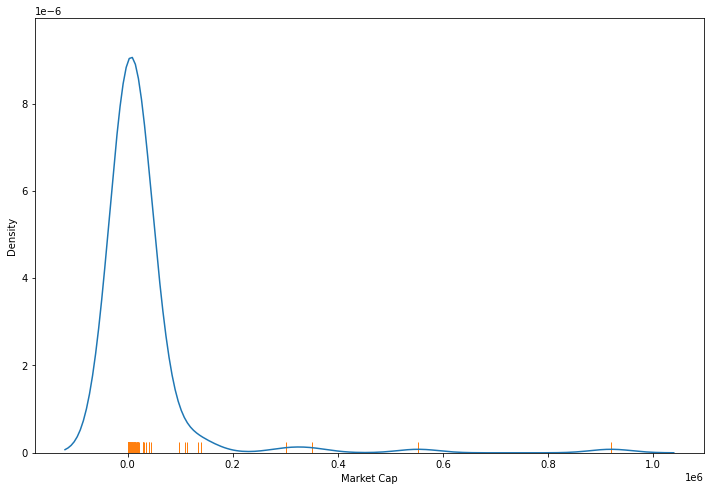

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Market Cap'])
sns.rugplot(df['Market Cap'])

A conclusão é que o Market Cap se mantém estável de um modo geral, tirando alguns Outliers acima de 20.000, ou ainda, podemos considerar que os Outliers se comprometem bastante acima do 3º Quartil (75%): 13587.1 ETH. Ainda mais quando se considera que a mediana é 2179 ETH, podemos entender que a maior parte dos projetos deve estar por volta desse valor.

In [ ]:
df[df['Market Cap'] < 13587].describe()

,Floor Price,Market Cap,Owners,Total Assets,Owner Ratio
count,93.000000,93.000000,93.000000,93.000000,92.000000
mean,0.426905,2935.177742,3108.193548,8998.172043,576.311466
std,0.673034,3604.813362,1875.635511,6461.492636,4634.801530
min,0.000000,0.000000,0.000000,0.000000,5.320000
25%,0.060000,448.450000,1837.000000,5000.000000,30.192872
50%,0.168000,1292.730000,2883.000000,8888.000000,37.438744
75%,0.600000,4524.780000,4252.000000,10000.000000,49.519416
max,4.150000,12967.500000,9226.000000,46169.000000,44233.333333


In [ ]:
df_cap = df[df['Market Cap'] < 13587]

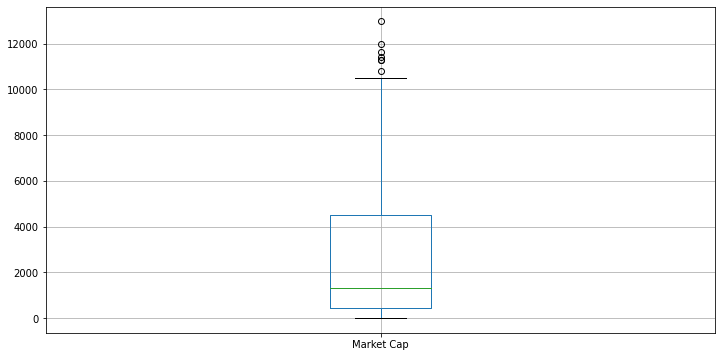

In [ ]:
plt.figure(figsize=(12,6))
df_cap.boxplot('Market Cap')
plt.show()

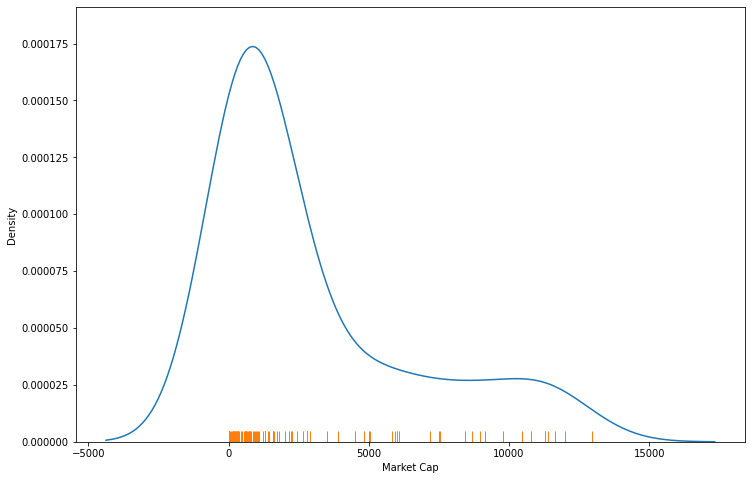

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_cap['Market Cap'])
sns.rugplot(df_cap['Market Cap'])

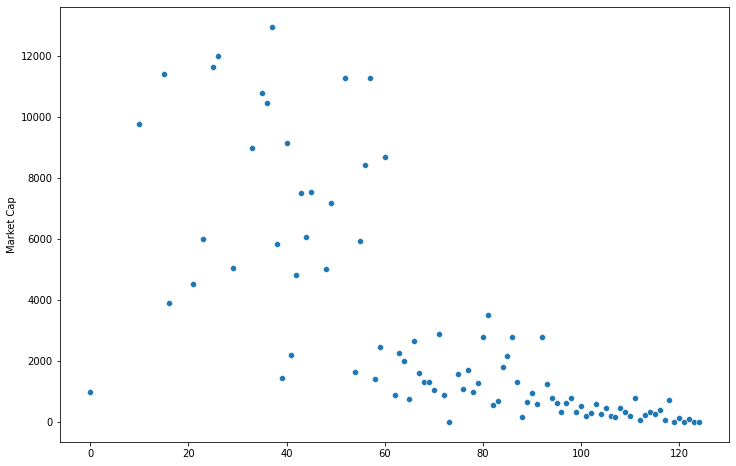

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_cap['Market Cap'])

- Diante dos gráficos, conseguimos compreender que ainda existe uma boa dispersão acima de por volta de 3000 ETH de market cap. Os projetos acima disso, talvez sejam o que devam ter uma atenção interessante para um investidor.

###Owners

In [ ]:
df['Owners'].head()

0     2648.0
1     6309.0
2     8270.0
3     5416.0
4    11720.0
Name: Owners, dtype: float64

In [ ]:
df['Owners'].tail()

120    1149.0
121    1327.0
122    2676.0
123      15.0
124    1192.0
Name: Owners, dtype: float64

In [ ]:
df['Owners'].describe()

count      125.000000
mean      3615.768000
std       2659.287481
min          0.000000
25%       1843.000000
50%       3354.000000
75%       4977.000000
max      19652.000000
Name: Owners, dtype: float64

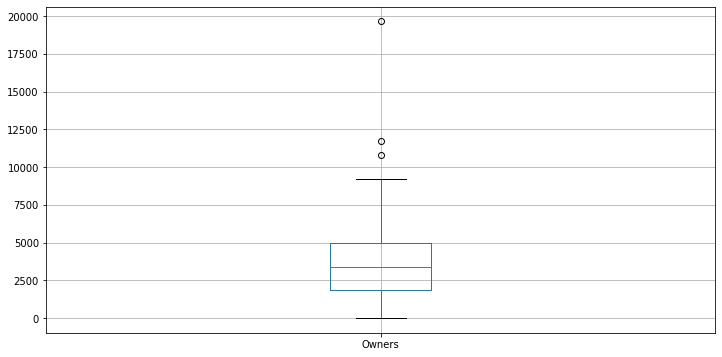

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot('Owners')
plt.show()

- Os proprietários do NFTs obedecem uma métrica muito mais concisa. O que isso nos indica? O fato é que um proprietário pode ter muitos NFTs e não possuímos esse número somente com essa feature. No entanto, o que podemos inferir é que os projetos que possuem muitos proprietários:
 - Estão completamente vendidos ou quase completamente.
 - Esses NFTs têm um preço baixo ou o projeto tem muita fama
 - Os projetos que têm poucos proprietários ou têm um preço alto ou têm pouco sucesso.

####Visualizações de dados:

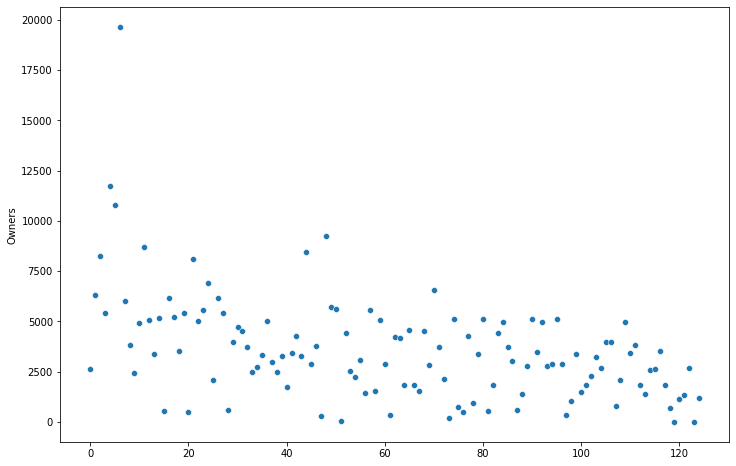

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Owners'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


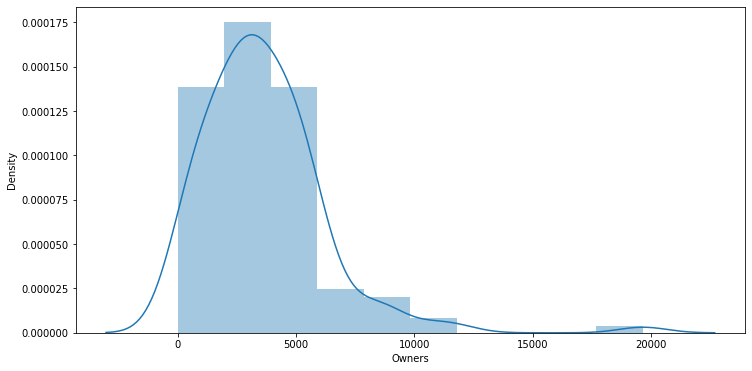

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df["Owners"], bins=10)

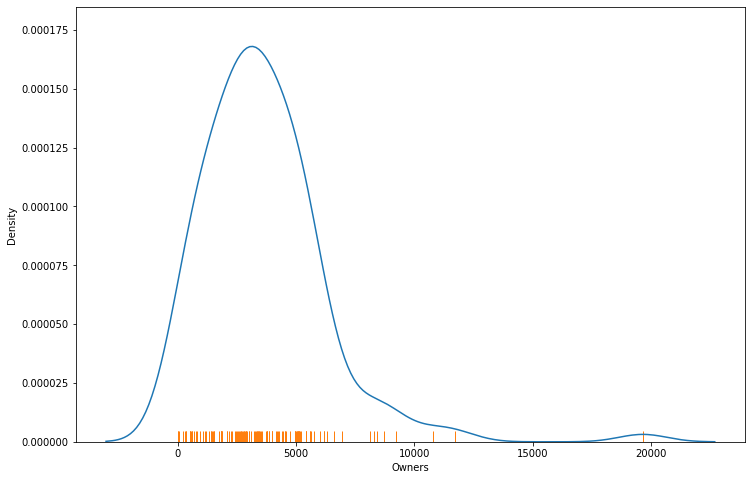

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Owners'])
sns.rugplot(df['Owners'])

###Total Assets

In [ ]:
df['Total Assets'].head()

0     4870.0
1    10000.0
2    18849.0
3    10000.0
4    17954.0
Name: Total Assets, dtype: float64

In [ ]:
df['Total Assets'].tail()

120    2250.0
121       3.0
122    8888.0
123      16.0
124    3624.0
Name: Total Assets, dtype: float64

In [ ]:
df['Total Assets'].describe()

count       125.000000
mean      10482.888000
std       13482.065665
min           0.000000
25%        7000.000000
50%        9933.000000
75%       10000.000000
max      143983.000000
Name: Total Assets, dtype: float64

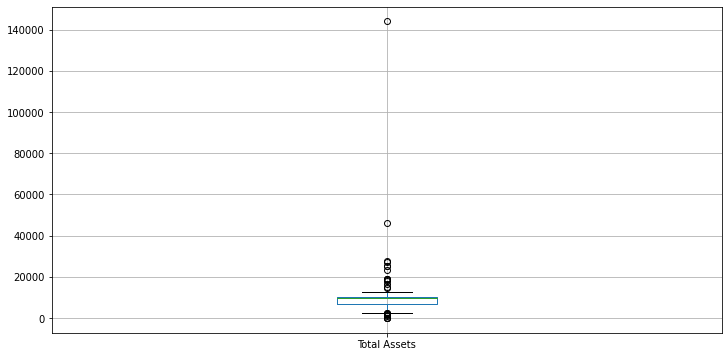

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot('Total Assets')
plt.show()

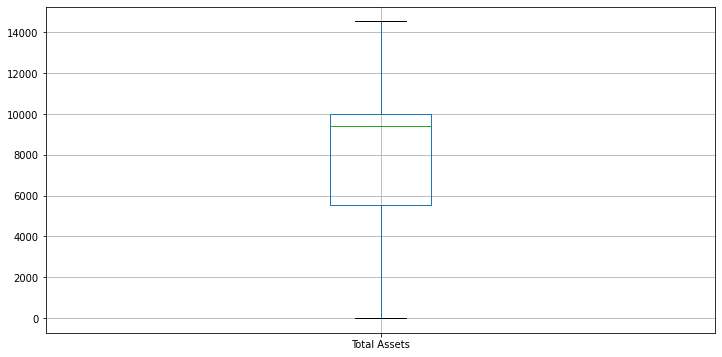

In [ ]:
plt.figure(figsize=(12,6))
df[df['Total Assets'] < 15000].boxplot('Total Assets')
plt.show()

- A maior parte dos projetos tem até 15000 NFTs.

In [ ]:
df_assets = df[df['Total Assets'] < 15000]
df_assets['Total Assets'].describe()

count      111.000000
mean      7817.099099
std       3170.764284
min          0.000000
25%       5552.500000
50%       9409.000000
75%      10000.000000
max      14533.000000
Name: Total Assets, dtype: float64

- 15 grandes outliers, ou seja, 15 projetos que tem uma quantidade NFTs que tão bem acima do 3º quartil. Ainda possuímos outliers com esse filtro, no entanto, é algo mais palatável.

####Visualização de dados:

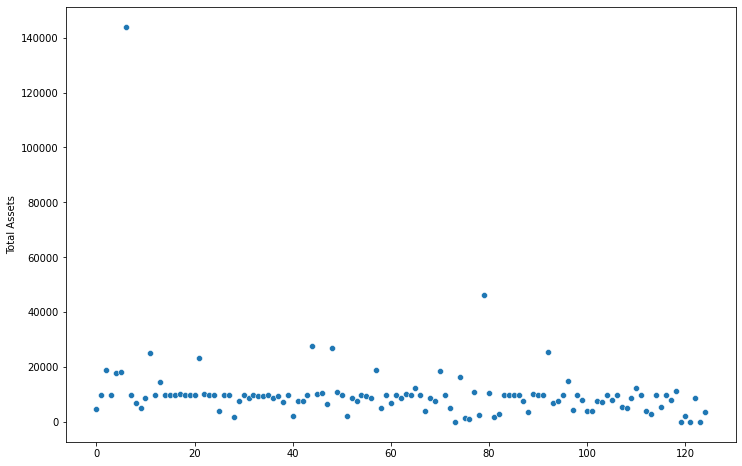

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Total Assets'])

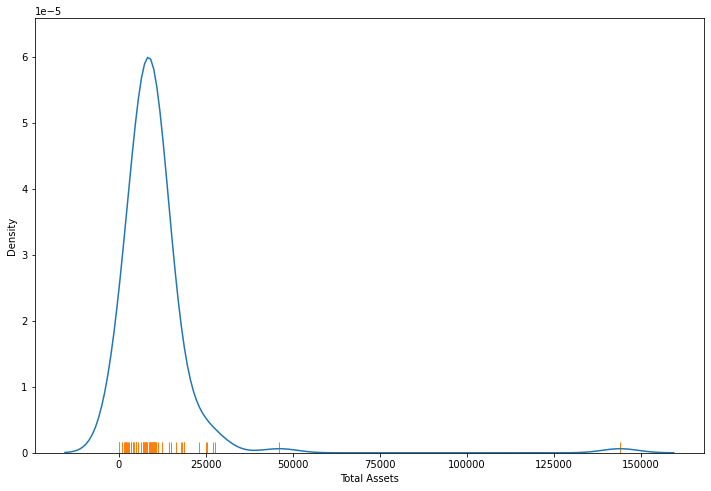

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Total Assets'])
sns.rugplot(df['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


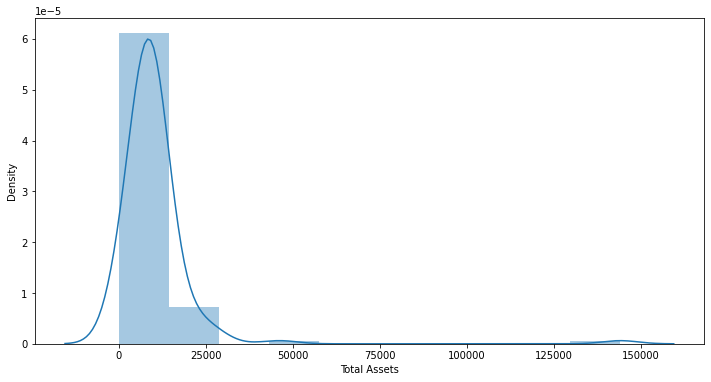

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df["Total Assets"], bins=10)

- Visualizações com filtragem feita:

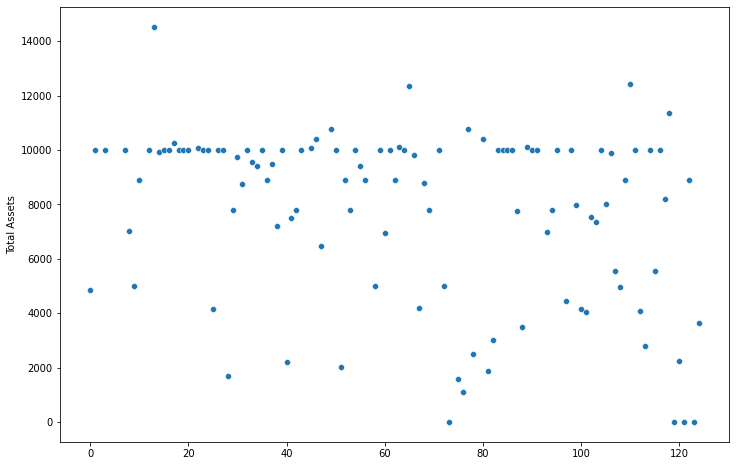

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_assets['Total Assets'])

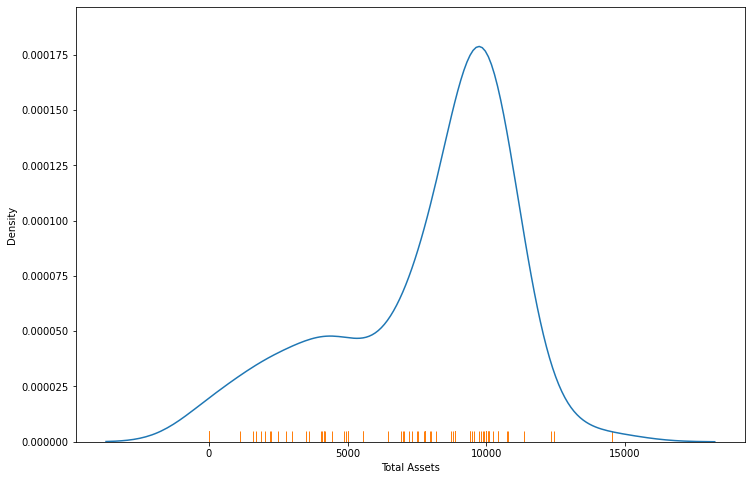

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_assets['Total Assets'])
sns.rugplot(df_assets['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


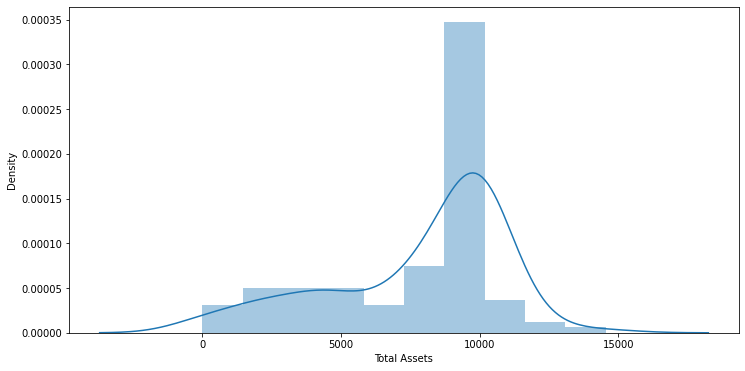

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df_assets["Total Assets"], bins=10)

- O interessante é pegarmos esses 14 projetos e entendê-los enquanto projetos que se distoam quanto a sua quantidade de NFTs, ver o seu Floor Price assim como a quantidade de Owners.

- A média de totais de NFTs dos projetos é 7796. A maior parte dos projetos, no entanto se concentra em 9409 ~ 10.000 NFTs.

###Owner Ratio:

- Antes de analisarmos a proporção entre proprietários e total assets, é interessante fazer uma correlação entre essas duas variáveis.

In [ ]:
df2 = pd.DataFrame([df['Owners'], df['Total Assets']])

In [ ]:
df2.transpose().describe()

,Owners,Total Assets
count,125.000000,125.000000
mean,3615.768000,10482.888000
std,2659.287481,13482.065665
min,0.000000,0.000000
25%,1843.000000,7000.000000
50%,3354.000000,9933.000000
75%,4977.000000,10000.000000
max,19652.000000,143983.000000


In [ ]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
Owners,2648.0,6309.0,8270.0,5416.0,11720.0,10796.0,19652.0,5992.0,3851.0,2434.0,4935.0,8704.0,5069.0,3358.0,5176.0,532.0,6167.0,5197.0,3523.0,5412.0,519.0,8120.0,5021.0,5580.0,6920.0,2082.0,6177.0,5417.0,603.0,3967.0,4739.0,4516.0,3751.0,2500.0,2745.0,3354.0,5043.0,2988.0,2474.0,3299.0,...,3722.0,3020.0,594.0,1381.0,2784.0,5113.0,3463.0,4959.0,2777.0,2905.0,5097.0,2860.0,349.0,1053.0,3400.0,1477.0,1839.0,2276.0,3238.0,2705.0,3965.0,3989.0,813.0,2084.0,4948.0,3448.0,3847.0,1838.0,1379.0,2574.0,2616.0,3545.0,1843.0,678.0,0.0,1149.0,1327.0,2676.0,15.0,1192.0
Total Assets,4870.0,10000.0,18849.0,10000.0,17954.0,18274.0,143983.0,10000.0,7025.0,5000.0,8888.0,24999.0,10000.0,14533.0,9933.0,10000.0,10000.0,10255.0,10000.0,10000.0,10000.0,23204.0,10080.0,10000.0,10000.0,4169.0,10000.0,10000.0,1700.0,7776.0,9757.0,8732.0,10000.0,9546.0,9409.0,10000.0,8888.0,9500.0,7214.0,10000.0,...,9999.0,10000.0,7761.0,3498.0,10100.0,10000.0,9999.0,25455.0,7000.0,7777.0,10000.0,15000.0,4444.0,10000.0,7976.0,4160.0,4027.0,7535.0,7335.0,9999.0,8008.0,9899.0,5555.0,4950.0,8888.0,12442.0,10000.0,4096.0,2798.0,10000.0,5550.0,10000.0,8192.0,11357.0,0.0,2250.0,3.0,8888.0,16.0,3624.0


In [ ]:
df2 = df2.transpose()

In [ ]:
df2

,Owners,Total Assets
0,2648.0,4870.0
1,6309.0,10000.0
2,8270.0,18849.0
3,5416.0,10000.0
4,11720.0,17954.0
...,...,...
120,1149.0,2250.0
121,1327.0,3.0
122,2676.0,8888.0
123,15.0,16.0


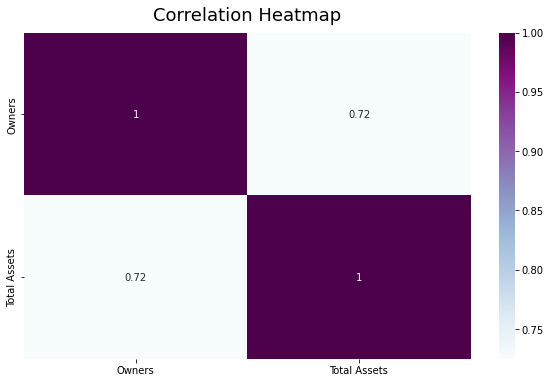

In [ ]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df2.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Correlação forte! O que faz perfeito sentido quanto mais ativos determinado projeto tem, mais proprietários tal projeto terá. 

In [ ]:
df3 = pd.DataFrame([df['Market Cap'], df['Total Assets']])

In [ ]:
df3 = df3.transpose()

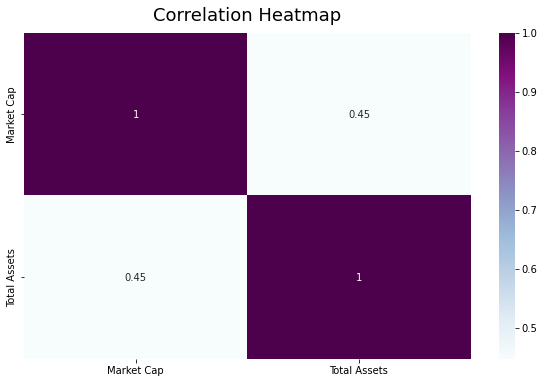

In [ ]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df3.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Correlacionando os três:

In [ ]:
df4 = pd.DataFrame([df['Owners'], df['Total Assets'], df['Market Cap']])

In [ ]:
df4 = df4.transpose()

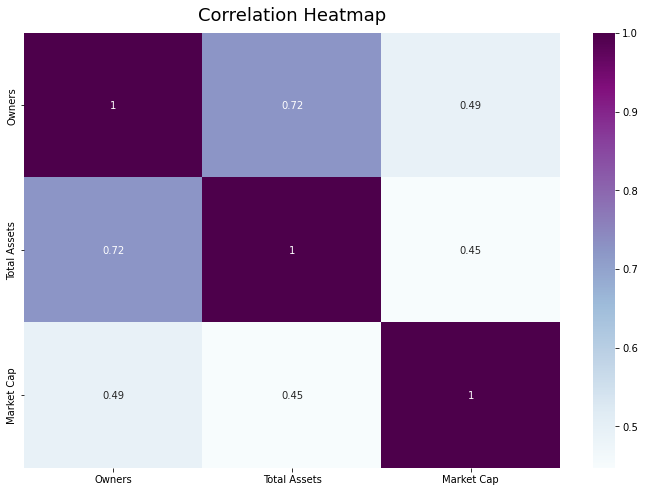

In [ ]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df4.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

####Analisando o Owner Ratio propriamente:

In [ ]:
df['Owner Ratio'].describe()

count      124.000000
mean       438.165594
std       3993.511697
min          2.869866
25%         30.204280
50%         38.974851
75%         50.875554
max      44233.333333
Name: Owner Ratio, dtype: float64

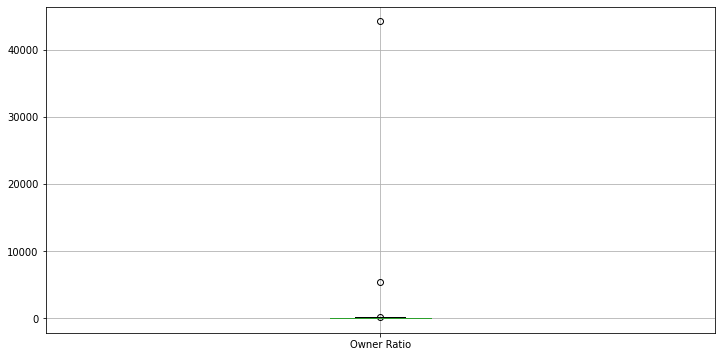

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot('Owner Ratio')
plt.show()

- Poucos outliers com considerações fortes.

In [ ]:
df_ratio = df[df['Owner Ratio'] < 2500]
df_ratio

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.1990,?,969.13,10925.78,2648.0,?,4870.0,54.373717
1,Bored Ape Yacht Club,92.0000,?,920000.00,1692.79,6309.0,?,10000.0,63.090000
2,CloneX,15.9900,?,301395.51,1029.29,8270.0,?,18849.0,43.875007
3,Azuki,11.2300,?,112300.00,871.19,5416.0,?,10000.0,54.160000
4,Mutant Ape Yacht Club,19.4900,?,349923.46,772.71,11720.0,?,17954.0,65.277932
...,...,...,...,...,...,...,...,...,...
118,Cometh Spaceships,0.0650,?,738.21,0.04,678.0,?,11357.0,5.969886
120,Borpacasso,0.0630,?,141.75,0.0,1149.0,?,2250.0,51.066667
122,Spookies,0.0123,?,109.32,0.0,2676.0,?,8888.0,30.108011
123,Lee Mullican,0.0000,?,0.00,0.0,15.0,?,16.0,93.750000


In [ ]:
df_ratio['Owner Ratio'].describe()

count    122.000000
mean      38.927871
std       16.308138
min        2.869866
25%       30.201427
50%       37.996876
75%       50.686930
max       93.750000
Name: Owner Ratio, dtype: float64

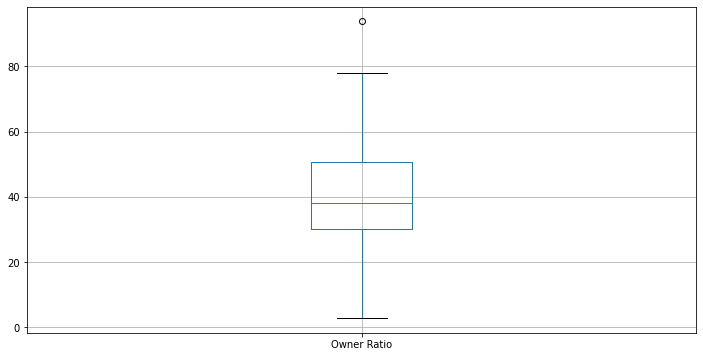

In [ ]:
plt.figure(figsize=(12,6))
df_ratio.boxplot('Owner Ratio')
plt.show()

- O que isso significa? O owner ratio é a razão entre a quantidade de proprietários que o projeto possui / Quantidade de NFTs do projeto. Portanto, quanto mais próximo de 1, mais próximo o projeto está de ter vendido tudo de certo. No entanto, isso não significa que quanto mais distante de 1 menos  chances do projeto ter vendido todos seus NFTs, visto que um proprietário pode ter mais de um NFT.

#4ºParte: Analisando as relações do início:

##Premissas:

1. O market cap é uma das features mais significativas, visto que é um dos parâmetros principais que os compradores olham ao avaliar um projeto NFT.

2. Podemos considerar, por ser os top projetos NFTs, que eles deram sold out, ou seja, eles foram completamente vendidos. Por que isso é relevante? Quando um projeto tem todos seus NFTs vendidos, ele é considerado um bom projeto e o seu floor price se estabiliza, na maioria das vezes. Não é incomum um projeto estar completamente vendido.



##As relações:


###Fazendo relações com o floor price:

In [ ]:
df_sold_in['Floor Price']

NameError: ignored

In [ ]:
df_sold_in['Floor Price']

In [ ]:
df_sold_in['Floor Price'] = df_sold_in['Floor Price'].astype(float)

In [ ]:
df3 = df_sold_in[df_sold_in['Floor Price'] < 22]

In [ ]:
df3['Floor Price'].describe()

In [ ]:
df2 = pd.DataFrame([df3['Owner Ratio'], df3['Floor Price']])

In [ ]:
df2 = df2.transpose()

In [ ]:
df2.corr(method="pearson")

##Hipóteses:

##Demonstração:

##Conclusões
